<a href="https://colab.research.google.com/github/ayush-adhikari/EDA-Python/blob/main/EDA_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Accidents Exploratory data analysis
### Todo - talk about the dataset(source, what it contains)
        - Kaggle
        - information about accidents
        - steps to prevent them.

## Data Download

In [1]:
# pip install fugue[sql]

In [2]:
# !pip install matplotlib --upgrade

In [3]:
# !pip install numpy --upgrade

In [4]:
pip install opendatasets --upgrade --quiet

In [5]:
import opendatasets as od

In [6]:
dataset_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adhikariayush2211
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 217MB/s]


In [7]:
file_directory = './us-accidents/US_Accidents_Dec21_updated.csv'

## Data Preparation and Cleaning
    - Load the file using pandas
    - look at some info about file
    - fix missing and incorrect values 

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.axes as axs
import matplotlib.pyplot as plt
import pandas as pd
import calendar
#from fugue_sql import fsql

In [9]:
df = pd.read_csv(file_directory)

In [10]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [12]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [13]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### missing percentages of null values

In [14]:
missing_percentage = df.isnull().sum().sort_values(ascending = False)/len(df)

In [15]:
missing_percentage = missing_percentage[missing_percentage!=0]*100

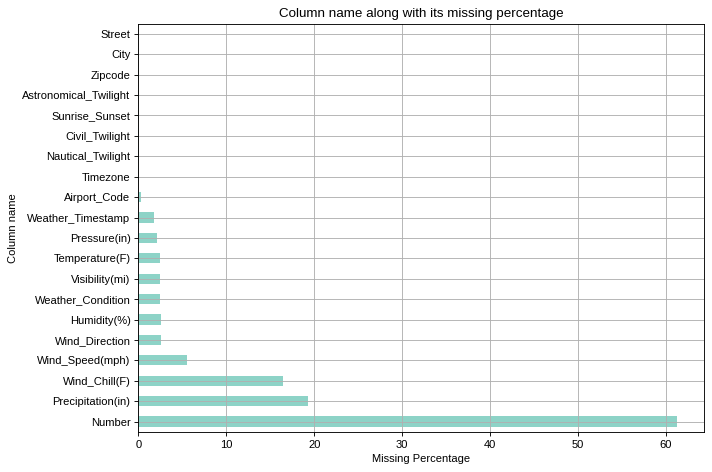

In [16]:
plt.subplots(figsize = (9,6), dpi = 80)
plt.style.use('seaborn')
missing_percentage.plot(kind = 'barh',colormap='Set3')
plt.xlabel("Missing Percentage")
plt.ylabel("Column name")
plt.title("Column name along with its missing percentage")
plt.tight_layout()

#### dropping Number column as it has more than 50% missing values

In [17]:
df.drop('Number', axis = 1)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


## Exploratory Analysis and Visualization
- Columns we'll analyze
  1. Cities
  2. Start time
  3. Start lang, Start Long.
  4. States

In [18]:
cities = df.City.unique()
len(cities)

11682

In [19]:
city_by_accident = df.City.value_counts()
city_by_accident.head(20)

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

In [20]:
city_by_accident[['Chicago','New York']]

Chicago     11188
New York     7068
Name: City, dtype: int64

In [21]:
top_10_cities = city_by_accident.head(10)
top_10_cities_df = top_10_cities.to_frame().reset_index().rename(columns={'index':'City', 'City':'Cases'})
top_10_cities_df.head(10)

,City,Cases
0,Miami,106966
1,Los Angeles,68956
2,Orlando,54691
3,Dallas,41979
4,Houston,39448
5,Charlotte,33152
6,Sacramento,32559
7,San Diego,26627
8,Raleigh,22840
9,Minneapolis,22768


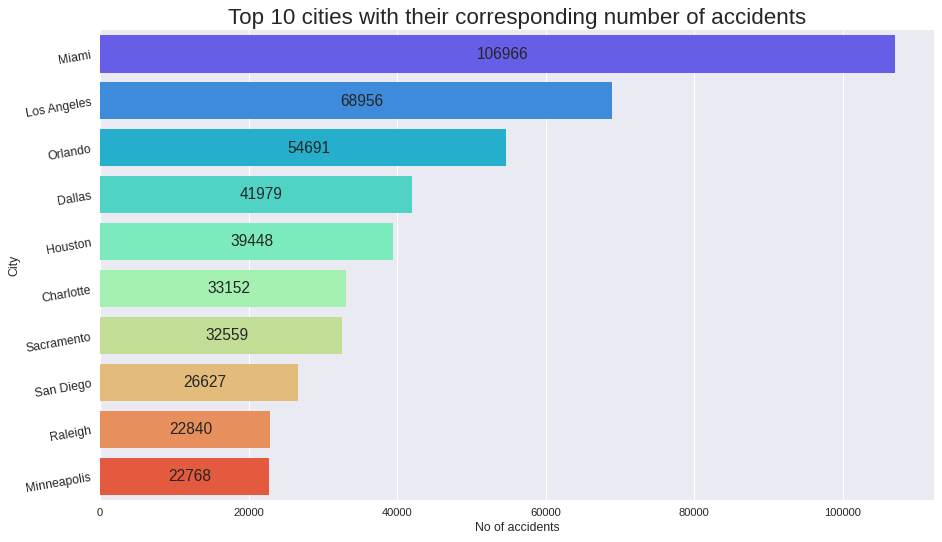

In [22]:
fig,ax = plt.subplots(figsize = (12,7), dpi = 80)
plt.style.use("fivethirtyeight")

ax = sns.barplot(data = top_10_cities_df, y = top_10_cities_df['City'],x = top_10_cities_df['Cases'],palette='rainbow')
ax.bar_label(ax.containers[0],padding = 5,label_type='center')
ax.tick_params(axis='y', labelsize=11, rotation=10)

plt.title("Top 10 cities with their corresponding number of accidents")
plt.xlabel("No of accidents")
plt.tight_layout()

In [23]:
sum(city_by_accident)

2845205

In [24]:
top_10_cities_df['Cases Percentage'] = list(round(top_10_cities_df['Cases']/sum(city_by_accident)*100,2))
top_10_cities_df['Yearly average'] = list(round(top_10_cities_df['Cases']/5).astype(int))
top_10_cities_df['Daily average'] = list(round(top_10_cities_df['Cases']/(5*365)).astype(int))
top_10_cities_df

,City,Cases,Cases Percentage,Yearly average,Daily average
0,Miami,106966,3.76,21393,59
1,Los Angeles,68956,2.42,13791,38
2,Orlando,54691,1.92,10938,30
3,Dallas,41979,1.48,8396,23
4,Houston,39448,1.39,7890,22
5,Charlotte,33152,1.17,6630,18
6,Sacramento,32559,1.14,6512,18
7,San Diego,26627,0.94,5325,15
8,Raleigh,22840,0.80,4568,13
9,Minneapolis,22768,0.80,4554,12


### Insights.
> Miami
- Miami has the most number of Accidents(3.76%) from 2016 to 2021.
- On an average 21K accidents occur in an year in Miami.
- On a daily basis approxiamtely 60 accidents occur in Miami.

> Los Angeles
- Los Angeles is second with 2.42% of total Accidents.
- On an average 13.8K accidents occur in an year in Los Angeles.
- On a daily basis approxiamtely 38 accidents occur in Los Angeles.

In [25]:
top_10_cities = df[df.City.isin(list(top_10_cities_df.City))]
top_10_cities = top_10_cities[['City', 'Start_Lat', 'Start_Lng']]

In [26]:
top_10_cities.drop_duplicates(subset = 'City', inplace = True)

In [27]:
top_10_cities

,City,Start_Lat,Start_Lng
1013,Sacramento,38.500342,-121.431106
5235,Los Angeles,34.092560,-118.206220
5237,San Diego,32.761642,-117.165355
11785,Dallas,32.843650,-96.774630
11802,Minneapolis,44.896459,-93.247350
11811,Houston,29.600380,-95.314480
15031,Orlando,36.115791,-97.320359
29519,Miami,36.862100,-94.851340
31586,Raleigh,35.754390,-78.640210
31639,Charlotte,35.252960,-80.891340


#### Using Seaborn to plot distribution graphs

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


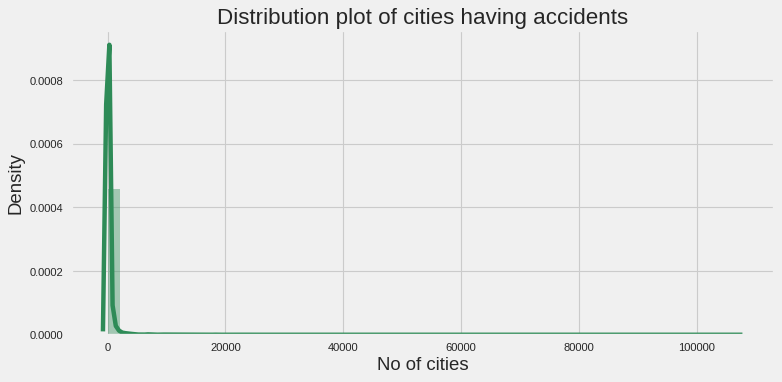

In [28]:
fig = plt.subplots(figsize = (10,5), dpi = 80)
sns.distplot(city_by_accident,color = 'seagreen')
plt.title("Distribution plot of cities having accidents")
plt.xlabel("No of cities")
plt.tight_layout()

### Cities with High number of accidents.

In [29]:
high_accident_cities = city_by_accident[city_by_accident>=1000]
print(len(high_accident_cities))
print(len(high_accident_cities)/len(cities)*100)
high_accident_cities.head(10)

496
4.245848313644924


Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

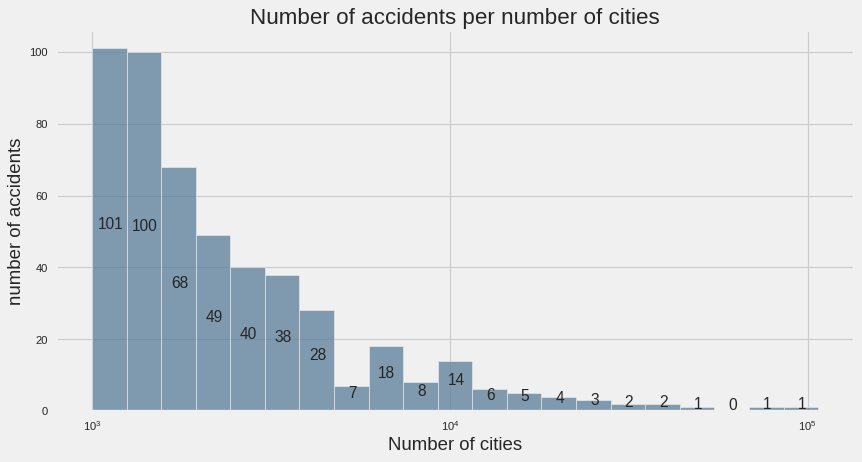

In [30]:
ax = plt.subplots(figsize = (11,6), dpi = 80)
plt.style.use("fivethirtyeight")

ax = sns.histplot(high_accident_cities,log_scale=True,color = '#5a7d9a')
ax.bar_label(ax.containers[0],padding = 5,label_type='center')

plt.title("Number of accidents per number of cities")
plt.xlabel("Number of cities")
plt.ylabel("number of accidents")
plt.tight_layout()

### Insights.
- Only 496 cities in US have recorded more than 1000 accidents in the time period from 2016 to 2021.
- This is only 4.25% of the total cities where accidents have been reported.



### Cities with Low number of accidents.

In [31]:
low_accident_cities = city_by_accident[city_by_accident<1000]
print(len(low_accident_cities))
print((len(low_accident_cities)/len(cities))*100)
low_accident_cities.head()


11185
95.74559150830338


Osseo          997
Madras         997
Manor          992
Portsmouth     988
Schenectady    985
Name: City, dtype: int64

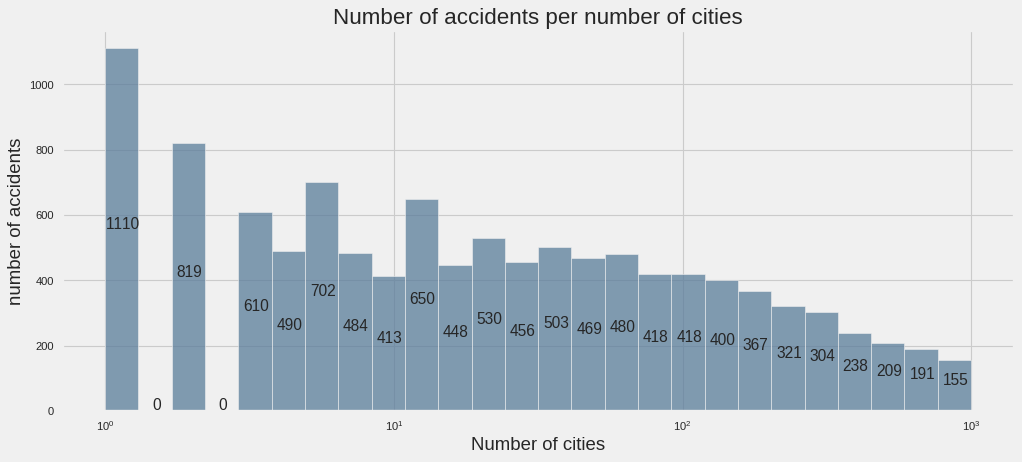

In [32]:
ax = plt.subplots(figsize = (13,6), dpi = 80)
plt.style.use("fivethirtyeight")

ax = sns.histplot(low_accident_cities,log_scale=True,color = '#5a7d9a')
ax.bar_label(ax.containers[0],padding = 5,label_type='center')

plt.title("Number of accidents per number of cities")
plt.xlabel("Number of cities")
plt.ylabel("number of accidents")
plt.tight_layout()

From this graph we can see that many cities have just 1 accident.

In [33]:
one_accident_cities = low_accident_cities[low_accident_cities == 1]
print(len(one_accident_cities)*100/len(cities))
print(low_accident_cities[low_accident_cities == 1])

9.501797637390858
Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64


Insights:
- Over 11,000 cities have reported less than 1000 accidents from 2016 to 2021.
- This is over 95% of the total accidents reported.
- Over 1,100 cities have just reported 1 accident which is approximately 9.5%

### Start Time

In [34]:
df['Start_Time']

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [35]:
df['Start_Time']=pd.to_datetime(df['Start_Time'])

In [36]:
starthour = df['Start_Time'].dt.hour
starthour.value_counts()

17    220358
16    218385
15    214264
14    191480
18    168982
13    166473
12    143715
7     135191
8     130879
19    116911
11    113271
6     111160
9     108779
10    103926
20     94682
21     87078
22     81188
5      80303
23     74243
0      68800
1      59370
2      55443
4      51805
3      48656
Name: Start_Time, dtype: int64

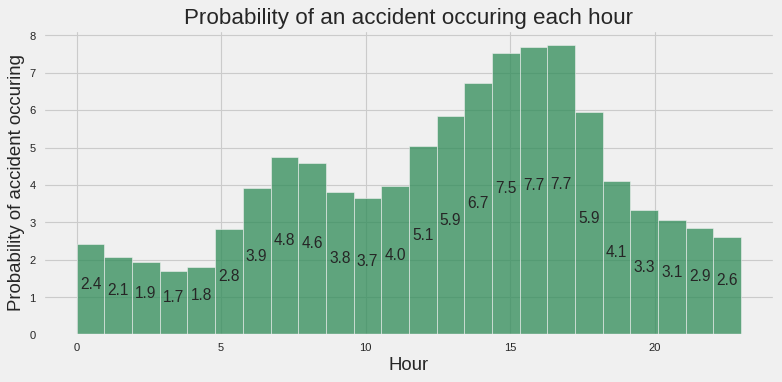

In [37]:
ax = plt.subplots(figsize = (10,5), dpi = 80)
plt.style.use("fivethirtyeight")

ax = sns.histplot(starthour,bins=24,stat = 'percent',kde=False,color = 'seagreen')
ax.bar_label(ax.containers[0],padding = 5,fmt='%.1f',label_type='center')

plt.title("Probability of an accident occuring each hour")
plt.xlabel("Hour")
plt.ylabel("Probability of accident occuring")
plt.tight_layout()

- judging from the graph above it can be infered that most accidents happen between 2 pm and 6 pm

In [38]:
df['Start_Time'].dt.day_name()

0          Monday
1          Monday
2          Monday
3          Monday
4          Monday
            ...  
2845337    Friday
2845338    Friday
2845339    Friday
2845340    Friday
2845341    Friday
Name: Start_Time, Length: 2845342, dtype: object

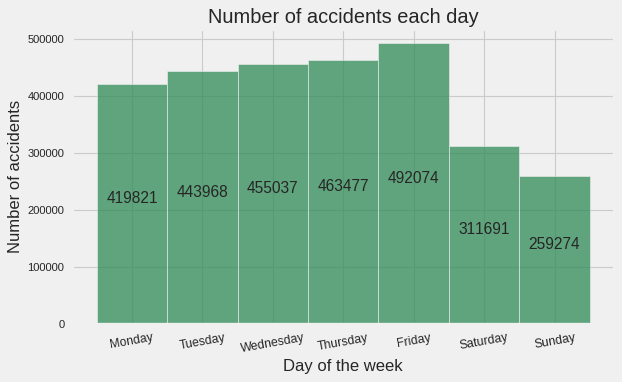

In [39]:
ax = plt.subplots(figsize = (8,5), dpi = 80)
plt.style.use("fivethirtyeight")

ax = sns.histplot(df['Start_Time'].dt.day_name(),bins=7,kde=False,color = 'seagreen')
ax.bar_label(ax.containers[0],padding = 5,label_type='center')
ax.tick_params(axis='x', labelsize=11, rotation=10)

plt.title("Number of accidents each day",size = 18)
plt.xlabel("Day of the week",size = 15)
plt.ylabel("Number of accidents", size = 15)
plt.tight_layout()

#### Is accidents distribution same on weekends as that on weekends

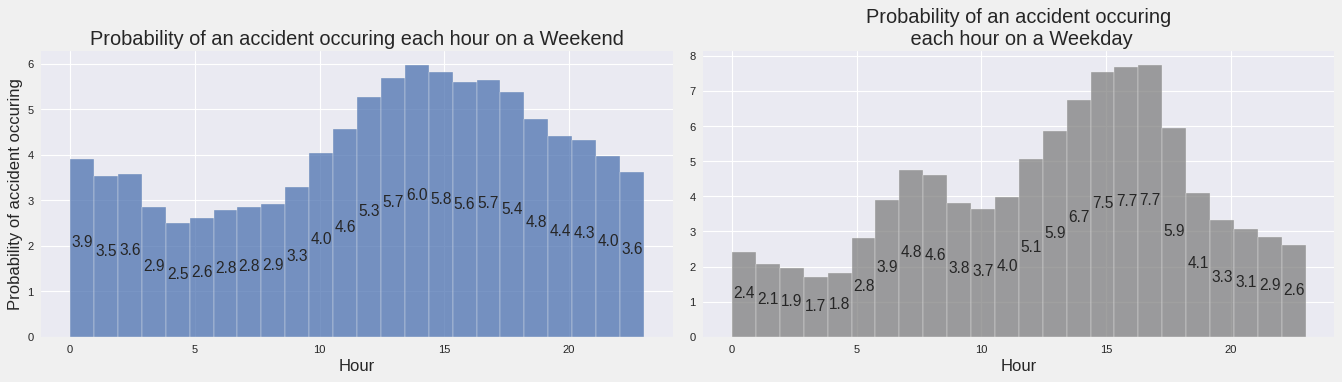

In [40]:
weekend_start_time = df.Start_Time[(df.Start_Time.dt.dayofweek == 6) | (df.Start_Time.dt.dayofweek == 5)].dt.hour
weekday_start_time = df.Start_Time[(df.Start_Time.dt.dayofweek != 6) | (df.Start_Time.dt.dayofweek != 5)].dt.hour

ax = plt.subplots(figsize = (17,5), dpi = 80)
plt.style.use("seaborn")

plt.subplot(1,2,1)
ax = sns.histplot(weekend_start_time,bins=24,stat = 'percent',kde=False)
ax.bar_label(ax.containers[0],padding = 5,fmt='%.1f',label_type='center')

plt.title("Probability of an accident occuring each hour on a Weekend",size = 18)
plt.xlabel("Hour",size = 15)
plt.ylabel("Probability of accident occuring",size = 15)

plt.subplot(1,2,2)
ax = sns.histplot(weekday_start_time,bins=24,stat = 'percent',kde=False,color = 'grey')
ax.bar_label(ax.containers[0],padding = 1,fmt='%.1f',label_type='center')

plt.title("Probability of an accident occuring\n each hour on a Weekday",size = 18)
plt.xlabel("Hour",size = 15)
plt.ylabel("",size = 15)
plt.tight_layout()

- On Weekends accidents keep on happening till modnight whereas on weekdays max no of accidents happen between 1 pm to 6 pm
- On Weekdays there is a sharp increase in no of accidents at around 6 am to 10 am.

#### Accidents trend on a monthly basis.

In [41]:
monthDF = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={'index':'Month', 'Start_Time':'Cases'}).sort_values('Month')
month_names = list(calendar.month_name)[1:]
monthDF['Month'] = month_names
monthDF

,Month,Cases
5,January,198365
6,February,194995
11,March,158224
9,April,171880
7,May,181944
4,June,226561
10,July,159111
8,August,178670
3,September,241822
2,October,299131


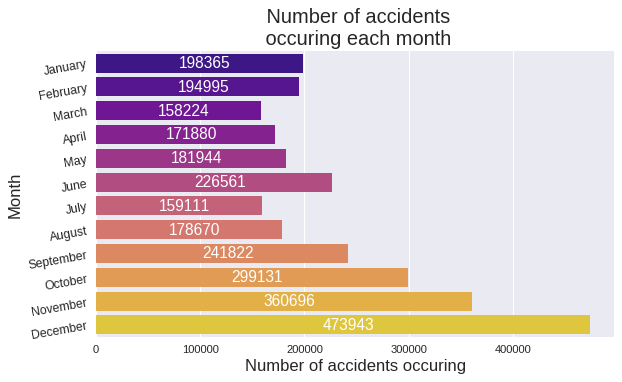

In [42]:
ax = plt.subplots(figsize = (8,5), dpi = 80)
plt.style.use("seaborn")

ax = sns.barplot(data = monthDF, x = monthDF.Cases, y = monthDF.Month,palette = 'plasma')
ax.bar_label(ax.containers[0],padding = 5,label_type='center',color = 'white')
ax.tick_params(axis='y', labelsize=11, rotation=10)

plt.title(" Number of accidents\n occuring each month",size = 18)
plt.ylabel("Month",size = 15)
plt.xlabel("Number of accidents occuring",size = 15)
plt.tight_layout()

- As seen from this graph most accidents happen in the month of December, with a shocking reduction in number during summers.
- It may be required to look at the graph for each year individually to look if the pattern is same each year or there's some data missing.

In [43]:
df[df.Start_Time.dt.year == 2016].Start_Time.dt.month.value_counts()

12    17835
11    17381
8     16737
10    16272
9     14269
7     13903
6      9624
5      7148
4      5904
3      2398
2       546
1         7
Name: Start_Time, dtype: int64

In [44]:
df_2016 = df[df.Start_Time.dt.year == 2016].Start_Time.dt.month.value_counts().reset_index()
df_2016 = df_2016.rename(columns={'index':'Month','Start_Time':'Number of accidents'}).sort_values('Month')
df_2016['Month'] = month_names

df_2017 = df[df.Start_Time.dt.year == 2017].Start_Time.dt.month.value_counts().reset_index()
df_2017 = df_2017.rename(columns={'index':'Month','Start_Time':'Number of accidents'}).sort_values('Month')
df_2017['Month'] = month_names

df_2018 = df[df.Start_Time.dt.year == 2018].Start_Time.dt.month.value_counts().reset_index()
df_2018 = df_2018.rename(columns={'index':'Month','Start_Time':'Number of accidents'}).sort_values('Month')
df_2018['Month'] = month_names

df_2019 = df[df.Start_Time.dt.year == 2019].Start_Time.dt.month.value_counts().reset_index()
df_2019 = df_2019.rename(columns={'index':'Month','Start_Time':'Number of accidents'}).sort_values('Month')
df_2019['Month'] = month_names

df_2020 = df[df.Start_Time.dt.year == 2020].Start_Time.dt.month.value_counts().reset_index()
df_2020 = df_2020.rename(columns={'index':'Month','Start_Time':'Number of accidents'}).sort_values('Month')
df_2020['Month'] = month_names

df_2021 = df[df.Start_Time.dt.year == 2021].Start_Time.dt.month.value_counts().reset_index()
df_2021 = df_2021.rename(columns={'index':'Month','Start_Time':'Number of accidents'}).sort_values('Month')
df_2021['Month'] = month_names

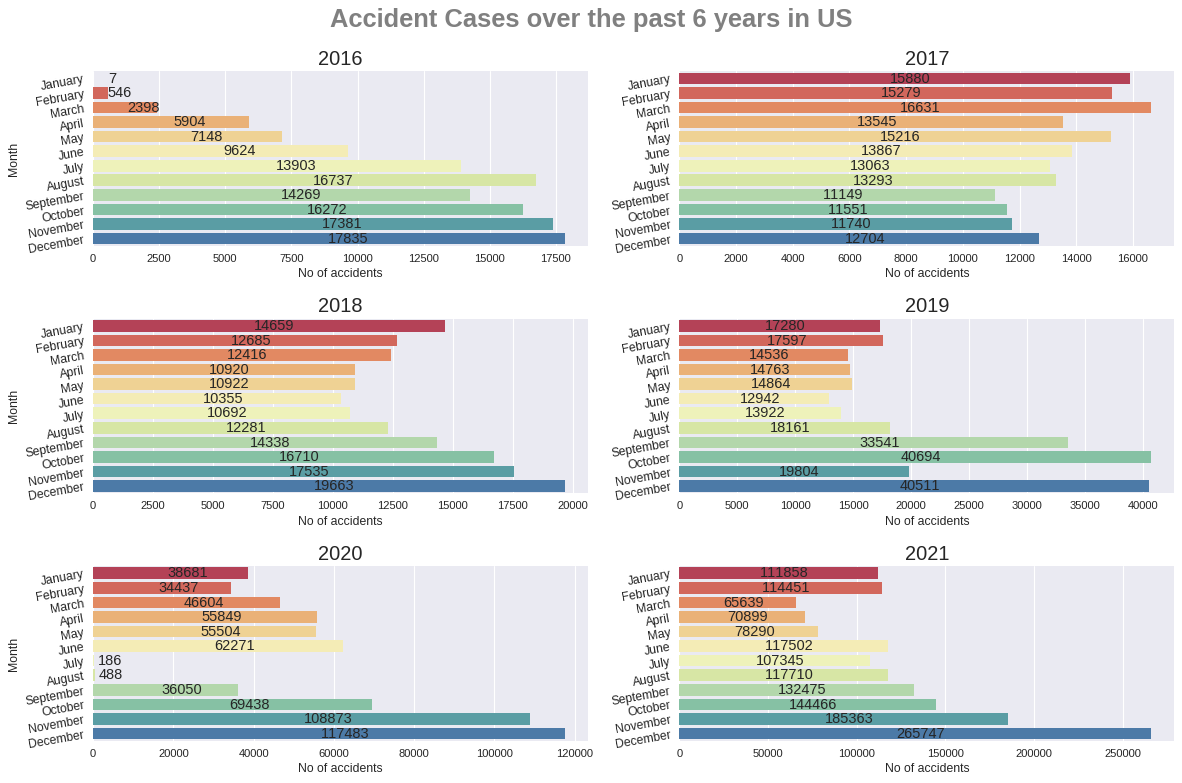

In [45]:
fig,ax = plt.subplots(figsize=(15, 10), dpi = 80)

plt.style.use("seaborn")

fig.suptitle('Accident Cases over the past 6 years in US', fontsize=23,fontweight ="bold", color='grey')

plt.subplot(3,2,1)
ax= sns.barplot(data = df_2016,x = 'Number of accidents',y = 'Month',palette="Spectral")
plt.title("2016",size = 18)
plt.xlabel("No of accidents")
ax.bar_label(ax.containers[0],padding = 17,label_type = 'center',size = 13)
ax.tick_params(axis='y', labelsize=11, rotation=10)

plt.subplot(3,2,2)
ax = sns.barplot(data = df_2017,x = 'Number of accidents',y = 'Month',palette="Spectral")
plt.title("2017",size = 18)
plt.xlabel("No of accidents")
ax.bar_label(ax.containers[0],padding = 5,label_type = 'center',size = 13)
ax.tick_params(axis='y', labelsize=11, rotation=10)
plt.ylabel("")

plt.subplot(3,2,3)
ax = sns.barplot(data = df_2018,x = 'Number of accidents',y = 'Month',palette="Spectral")
plt.title("2018",size = 18)
plt.xlabel("No of accidents")
ax.bar_label(ax.containers[0],padding = 5,label_type = 'center',size = 13)
ax.tick_params(axis='y', labelsize=11, rotation=10)

plt.subplot(3,2,4)
ax = sns.barplot(data = df_2019,x = 'Number of accidents',y = 'Month',palette="Spectral")
plt.title("2019",size = 18)
plt.xlabel("No of accidents")
ax.bar_label(ax.containers[0],padding = 5,label_type = 'center',size = 13)
ax.tick_params(axis='y', labelsize=11, rotation=10)
plt.ylabel("")

plt.subplot(3,2,5)
ax = sns.barplot(data = df_2020,x = 'Number of accidents',y = 'Month',palette="Spectral")
plt.title("2020",size = 18)
plt.xlabel("No of accidents")
ax.bar_label(ax.containers[0],padding = 15,label_type = 'center',size = 13)
ax.tick_params(axis='y', labelsize=11, rotation=10)

plt.subplot(3,2,6)
ax = sns.barplot(data = df_2021,x = 'Number of accidents',y = 'Month',palette="Spectral")
plt.title("2021",size = 18)
plt.xlabel("No of accidents")
ax.bar_label(ax.containers[0],padding = 5,label_type = 'center',size = 13)
ax.tick_params(axis='y', labelsize=11, rotation=10)
plt.ylabel("")

plt.tight_layout()

- For year 2016, the number of accidents is very low initially but the number keeps on increasing linearly throughout the first half of the year. In the second half their is not much change.
- For year 2017, the number are not that different for each month.
- Comparing 2016 and 2017, there is a large contrast in the number of accidents for the first half of the year and the comparison trend is opposite for the second half.
- It can be infered from the above graphs that due to some reason not much data was calculated for the initial months of 2016.

- For the year 2020, there isn't any data collected for month of July and negligible data for August.
- Reason needs to be investigated.

### Start_Lat and Start_Lng

In [46]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [47]:
sample_df = df.sample(int(0.01*len(df)))
heat_data = zip(list(sample_df['Start_Lat']),list(sample_df['Start_Lng']))


In [48]:
map = folium.Map()
HeatMap(heat_data).add_to(map)
map

### Temperature

In [49]:
len(df['Temperature(F)'].round().unique())

166

In [50]:
unique_temperature = df['Temperature(F)'].round().unique()
unique_temperature = unique_temperature.astype(int)
unique_temperature = unique_temperature[unique_temperature!=unique_temperature[unique_temperature<-100]]

In [51]:
count_temperature = df['Temperature(F)'].round().value_counts()
#count_temperature
low_count = count_temperature[count_temperature<10]
print(low_count.index)

Float64Index([116.0, -25.0, 118.0, 120.0, -27.0, 119.0, -29.0, -28.0, 196.0,
              -89.0, -50.0, 171.0, 169.0, -40.0, -58.0, -30.0, -33.0, 144.0,
              136.0, 129.0, 127.0, 156.0, -78.0],
             dtype='float64')


In [52]:
print(type(low_count))

<class 'pandas.core.series.Series'>


In [53]:
count_temperature.drop(labels=low_count.index,inplace=True)

In [54]:
count_temperature.sort_index(ascending=True, inplace=True)

In [55]:
count_temperature

-26.0      19
-24.0      17
-23.0      21
-22.0      27
-21.0      24
         ... 
 112.0    110
 113.0     70
 114.0     49
 115.0     33
 117.0     16
Name: Temperature(F), Length: 142, dtype: int64

In [56]:
temperature_range = np.linspace(count_temperature.index[0],count_temperature.index[-1], num = 15)
temperature_range = temperature_range.astype(int)

In [57]:
temperature_range

array([-26, -15,  -5,   4,  14,  25,  35,  45,  55,  65,  76,  86,  96,
       106, 117])

In [58]:
def temperature_df(t_range,c_temp):
  sum=0.0
  new_df = pd.Series()
  for index in range(len(t_range)-1):
    for element in c_temp:
      if (c_temp.index >= t_range[index]).any() and (c_temp.index < t_range[index+1]).any():
        sum+=element
      new_df.add(sum)
      sum = 0.0
  return new_df

    #[sum+=element for element in c_temp if c_temp.index >=t_range[index] && c_temp.index<t_range[index+1]]


In [59]:
n_df = temperature_df(temperature_range, count_temperature)
n_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


Series([], dtype: float64)

### **State Wise Analysis**

In [60]:
# create a dictionary using US State code and their corresponding Name
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}
# function to convert 2 digit State name to full name
def State_name(state):
  return us_states[state]

In [61]:
# dataframe comprising of state names and their corresponding accident numbers.
state_df = pd.DataFrame(df['State'].value_counts().reset_index().rename(columns={'index':'State','State':'Number of accidents'}))
state_df['State'] = state_df['State'].apply(State_name)   # converting and applying the full state name to our dataframe.
top_10_states = list(state_df['State'].head(10))


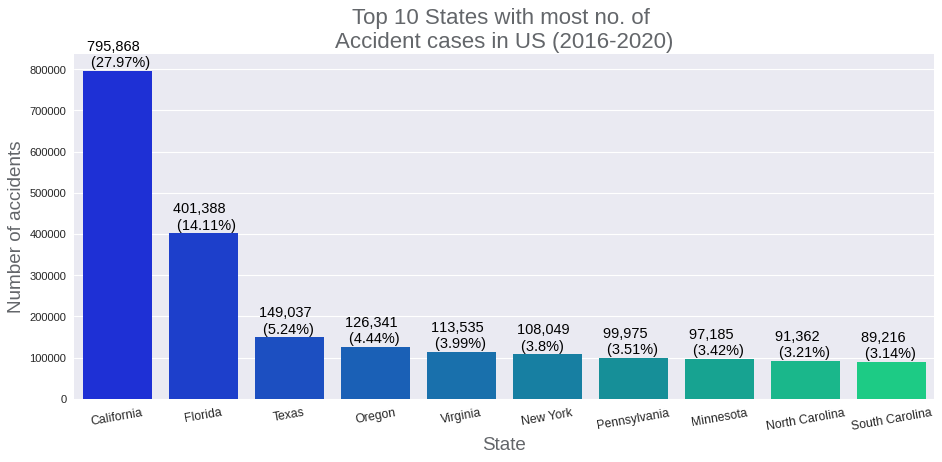

In [62]:
# Top 10 States with highest number of accidents.
ax = plt.subplots(figsize = (12,6), dpi = 80)
plt.style.use("seaborn")
ax = sns.barplot(data=state_df.head(10),x = 'State',y = 'Number of accidents',palette = 'winter')

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+10000, \
            ' {:,d}\n  ({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 2)), fontsize=13,
                color='black')

ax.tick_params(axis='x', labelsize=11, rotation=10)

plt.title("Top 10 States with most no. of \nAccident cases in US (2016-2020)",color = '#63666A',size = 20)
plt.ylabel("Number of accidents",color = '#63666A',size = 17)
plt.xlabel("State",color = '#63666A',size = 17)
plt.tight_layout()

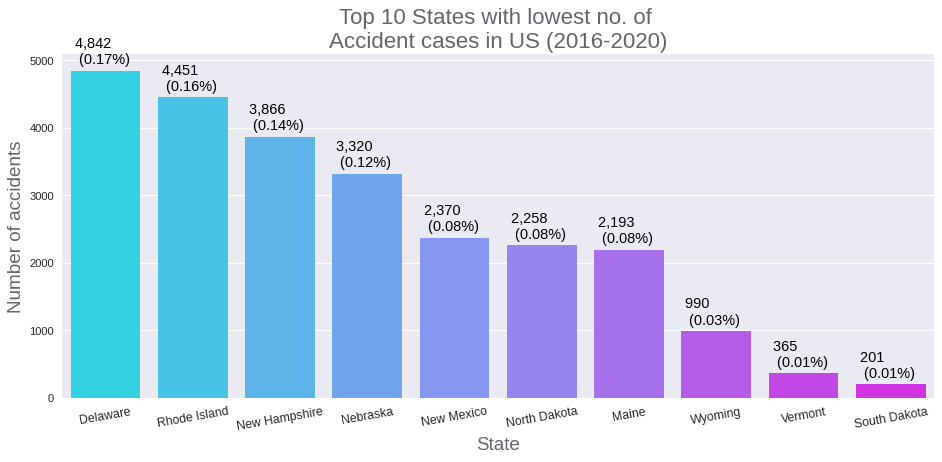

In [63]:
ax = plt.subplots(figsize = (12,6), dpi = 80)
plt.style.use("seaborn")
ax = sns.barplot(data=state_df.tail(10),x = 'State',y = 'Number of accidents',palette = 'cool')

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+100, \
            ' {:,d}\n  ({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 2)), fontsize=13,
                color='black')

ax.tick_params(axis='x', labelsize=11, rotation=10)

plt.title("Top 10 States with lowest no. of \nAccident cases in US (2016-2020)",color = '#63666A',size = 20)
plt.ylabel("Number of accidents",color = '#63666A',size = 17)
plt.xlabel("State",color = '#63666A',size = 17)
plt.tight_layout()

### Insights
- California has maximum number of road accidents in the last 5 years.
- 28% of the total accidents from 2016 - 2021 happened in California alone.
- Florida is in second place having apprx 14% of total accidents.
- Top 4 states(Califirnia, Florida, Texas, Oregan) account for approximately 50 % of all the accidents that happened from 2016 to 2021.